In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('loan-data-673b233f1c1cb921157550.csv')

In [2]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


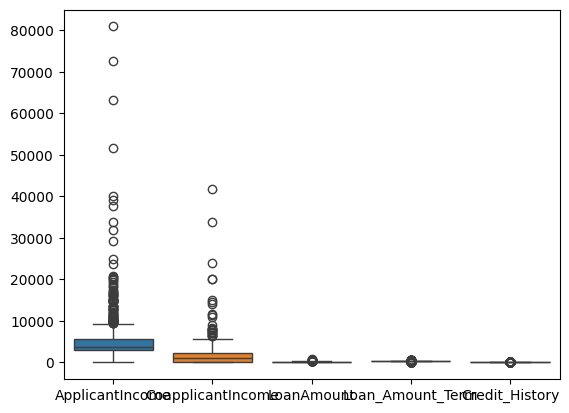

In [4]:
sns.boxplot(data)
data = data.drop('Loan_ID', axis=1)

<Axes: ylabel='LoanAmount'>

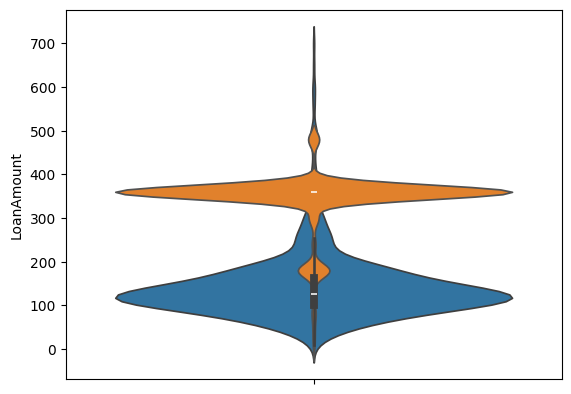

In [5]:
sns.violinplot(data['LoanAmount'])
sns.violinplot(data['Loan_Amount_Term'])

In [6]:
data = data.dropna()
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


<Axes: >

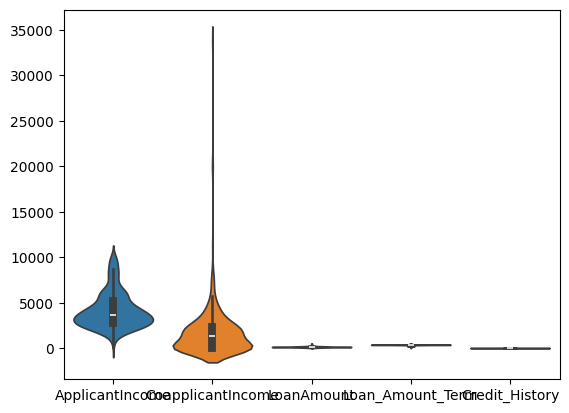

In [7]:
q1_inc = data['ApplicantIncome'].quantile(0.25)
q3_inc = data['ApplicantIncome'].quantile(0.75)
iqr_inc = q3_inc - q1_inc
borne_inf_inc = q1_inc - 1.5 * iqr_inc
borne_sup_inc = q3_inc + 1.5 * iqr_inc

data = data[(data['ApplicantIncome'] >= borne_inf_inc) & (data['ApplicantIncome'] <= borne_sup_inc)]

# Afficher ou travailler avec les données filtrées
data.describe()
sns.violinplot(data)


<Axes: >

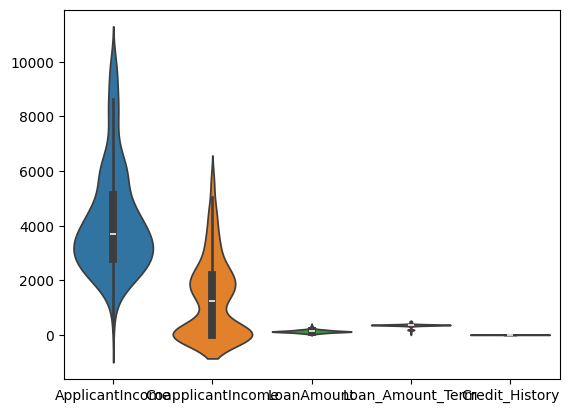

In [8]:
q1_coinc = data['CoapplicantIncome'].quantile(0.25)
q3_coinc = data['CoapplicantIncome'].quantile(0.75)
iqr_coinc = q3_coinc - q1_coinc
borne_inf_coinc = q1_coinc - 1.5 * iqr_coinc
borne_sup_coinc = q3_coinc + 1.5 * iqr_coinc

data = data[(data['CoapplicantIncome'] >= borne_inf_coinc) & (data['CoapplicantIncome'] <= borne_sup_coinc)]

sns.violinplot(data)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9560\1897893173.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})


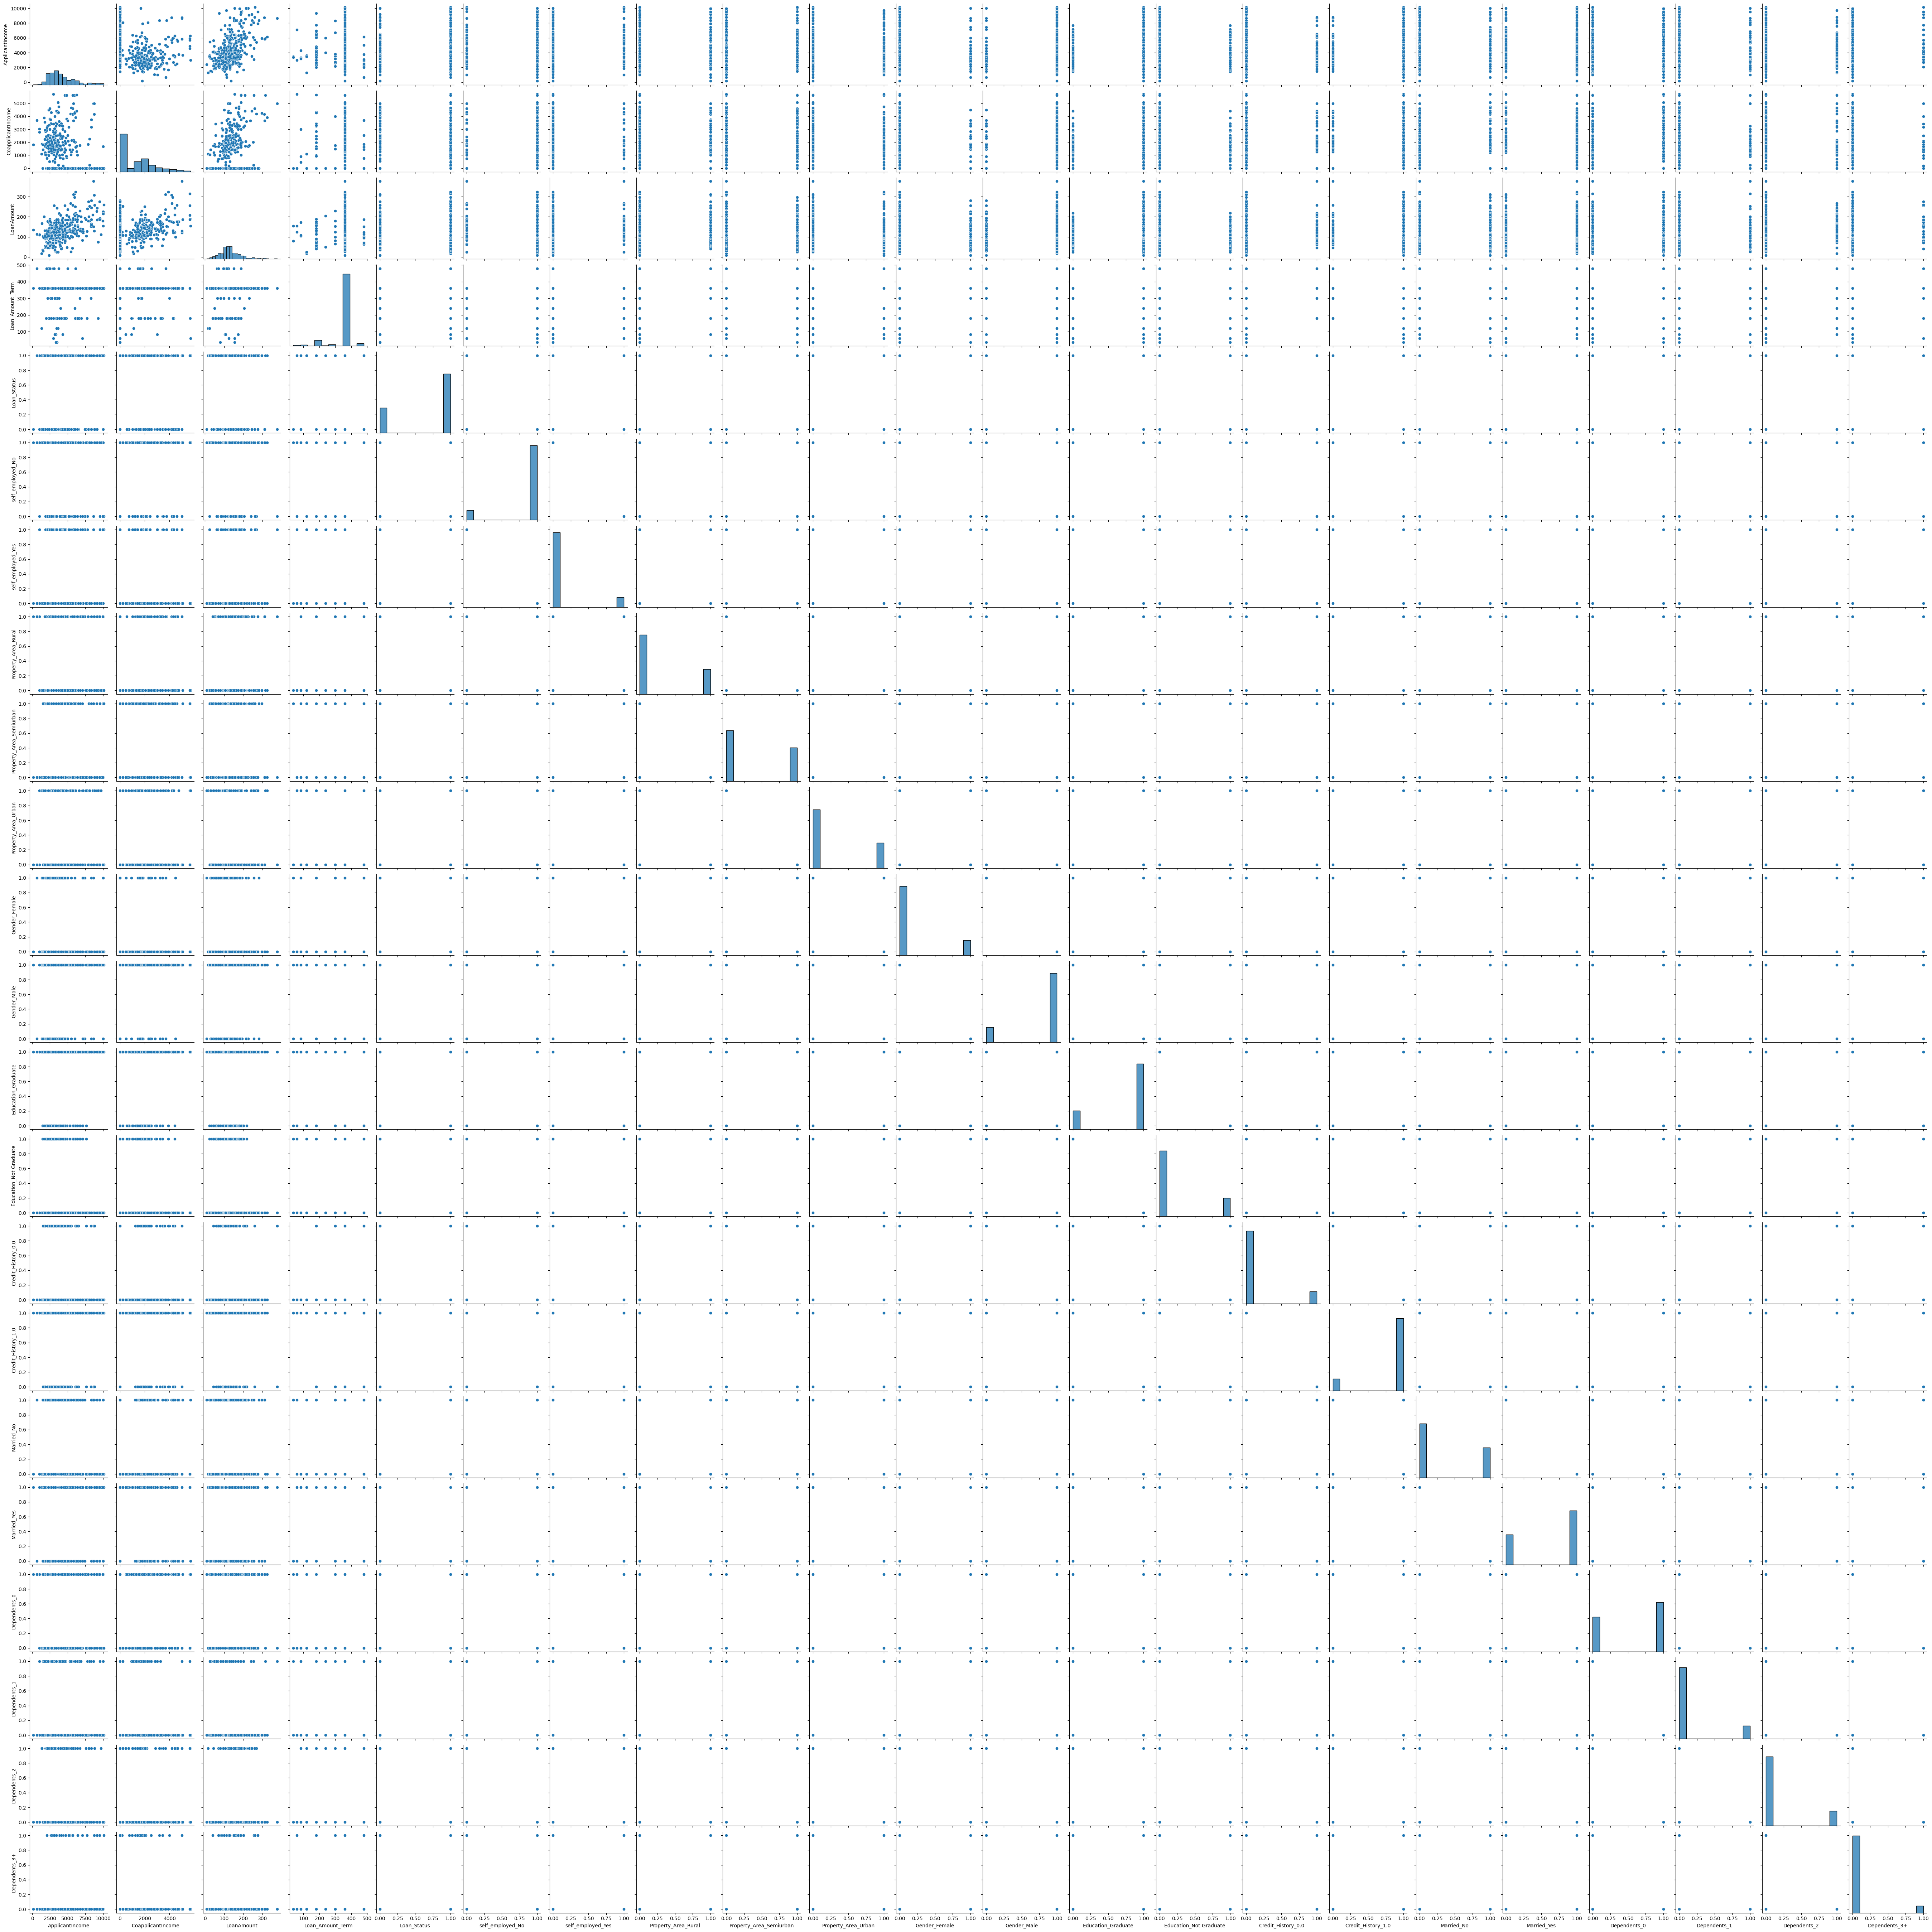

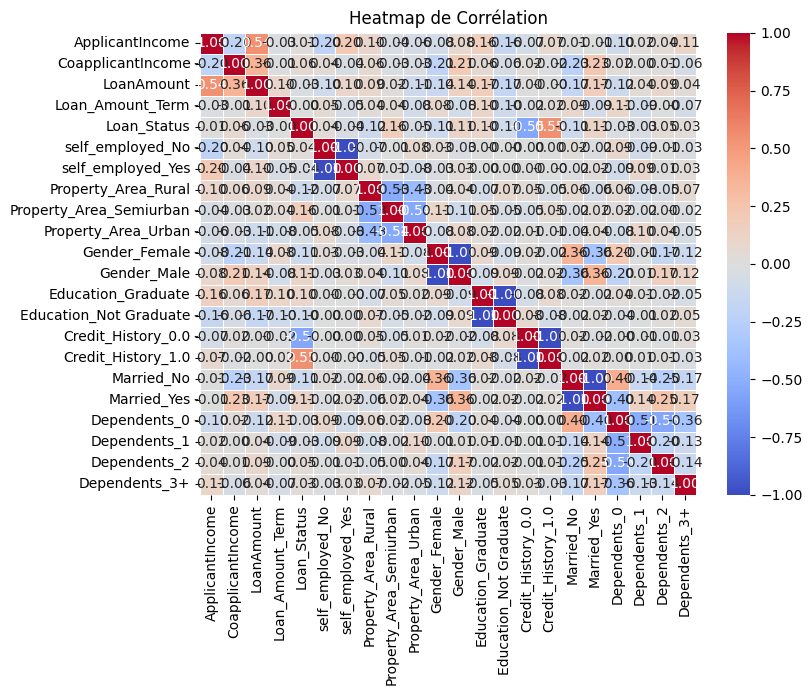

In [10]:
import matplotlib.pyplot as plt
# Génération des variables dummy
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})
dummies = pd.get_dummies(data['Self_Employed'], prefix='self_employed')
data = pd.concat([data.drop('Self_Employed', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Property_Area'], prefix='Property_Area')
data = pd.concat([data.drop('Property_Area', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Gender'], prefix='Gender')
data = pd.concat([data.drop('Gender', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Education'], prefix='Education')
data = pd.concat([data.drop('Education', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Credit_History'], prefix='Credit_History')
data = pd.concat([data.drop('Credit_History', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Married'], prefix='Married')
data = pd.concat([data.drop('Married', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Dependents'], prefix='Dependents')
data = pd.concat([data.drop('Dependents', axis=1), dummies], axis=1)
data.head()
sns.pairplot(data)


# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Créer la heatmap
plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# Afficher la heatmap
plt.title('Heatmap de Corrélation')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = MinMaxScaler().fit_transform(data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.403889,0.232688,0.331606,0.690204,0.701878
std,0.194691,0.254618,0.145412,0.149097,0.457971
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264291,0.000000,0.247956,0.729730,0.000000
50%,0.355141,0.217418,0.313351,0.729730,1.000000
75%,0.499049,0.385371,0.403270,0.729730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Loan_Status'>

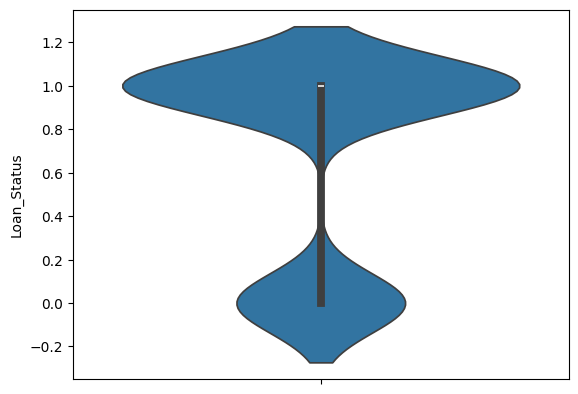

In [12]:
sns.violinplot(data['Loan_Status'])


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop('Loan_Status', axis=1)  # Supprime la colonne 'Loan_Status' pour obtenir X
y = data['Loan_Status']  # La cible est la colonne 'Loan_Status'

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner un modèle Arbre de Décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Prédictions et évaluation pour l'arbre de décision
y_pred_tree = decision_tree.predict(X_test)
print("Arbre de Décision - Précision :", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Initialiser et entraîner un modèle Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Prédictions et évaluation pour la forêt aléatoire
y_pred_rf = random_forest.predict(X_test)
print("Random Forest - Précision :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Arbre de Décision - Précision : 0.6511627906976745
              precision    recall  f1-score   support

           0       0.32      0.32      0.32        22
           1       0.77      0.77      0.77        64

    accuracy                           0.65        86
   macro avg       0.54      0.54      0.54        86
weighted avg       0.65      0.65      0.65        86

Random Forest - Précision : 0.7790697674418605
              precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.79      0.95      0.87        64

    accuracy                           0.78        86
   macro avg       0.73      0.61      0.63        86
weighted avg       0.76      0.78      0.74        86



In [14]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir les modèles à tester
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Définir les paramètres pour GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # Nombre d'arbres dans le Random Forest
    'max_depth': [None, 10, 20, 30],       # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],       # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],         # Nombre minimum d'échantillons pour être une feuille
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],       # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],       # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],         # Nombre minimum d'échantillons pour être une feuille
    'criterion': ['gini', 'entropy']      # Critère de séparation
}

# Effectuer le GridSearch pour RandomForest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)
grid_search_rf.fit(X_train, y_train)

# Effectuer le GridSearch pour DecisionTree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=3)
grid_search_dt.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la meilleure performance pour Random Forest
print("Meilleurs paramètres pour Random Forest:", grid_search_rf.best_params_)
print("Meilleure précision pour Random Forest: {:.4f}".format(grid_search_rf.best_score_))

# Afficher les meilleurs paramètres et la meilleure performance pour Decision Tree
print("Meilleurs paramètres pour Decision Tree:", grid_search_dt.best_params_)
print("Meilleure précision pour Decision Tree: {:.4f}".format(grid_search_dt.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres pour Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Meilleure précision pour Random Forest: 0.8190
Meilleurs paramètres pour Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleure précision pour Decision Tree: 0.7514


In [15]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split= 5, n_estimators= 50)
random_forest.fit(X_train, y_train)

# Prédictions et évaluation pour la forêt aléatoire
y_pred_rf = random_forest.predict(X_test)
print("Random Forest - Précision :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




Random Forest - Précision : 0.796875
              precision    recall  f1-score   support

           0       0.80      0.34      0.48        35
           1       0.80      0.97      0.87        93

    accuracy                           0.80       128
   macro avg       0.80      0.66      0.68       128
weighted avg       0.80      0.80      0.77       128



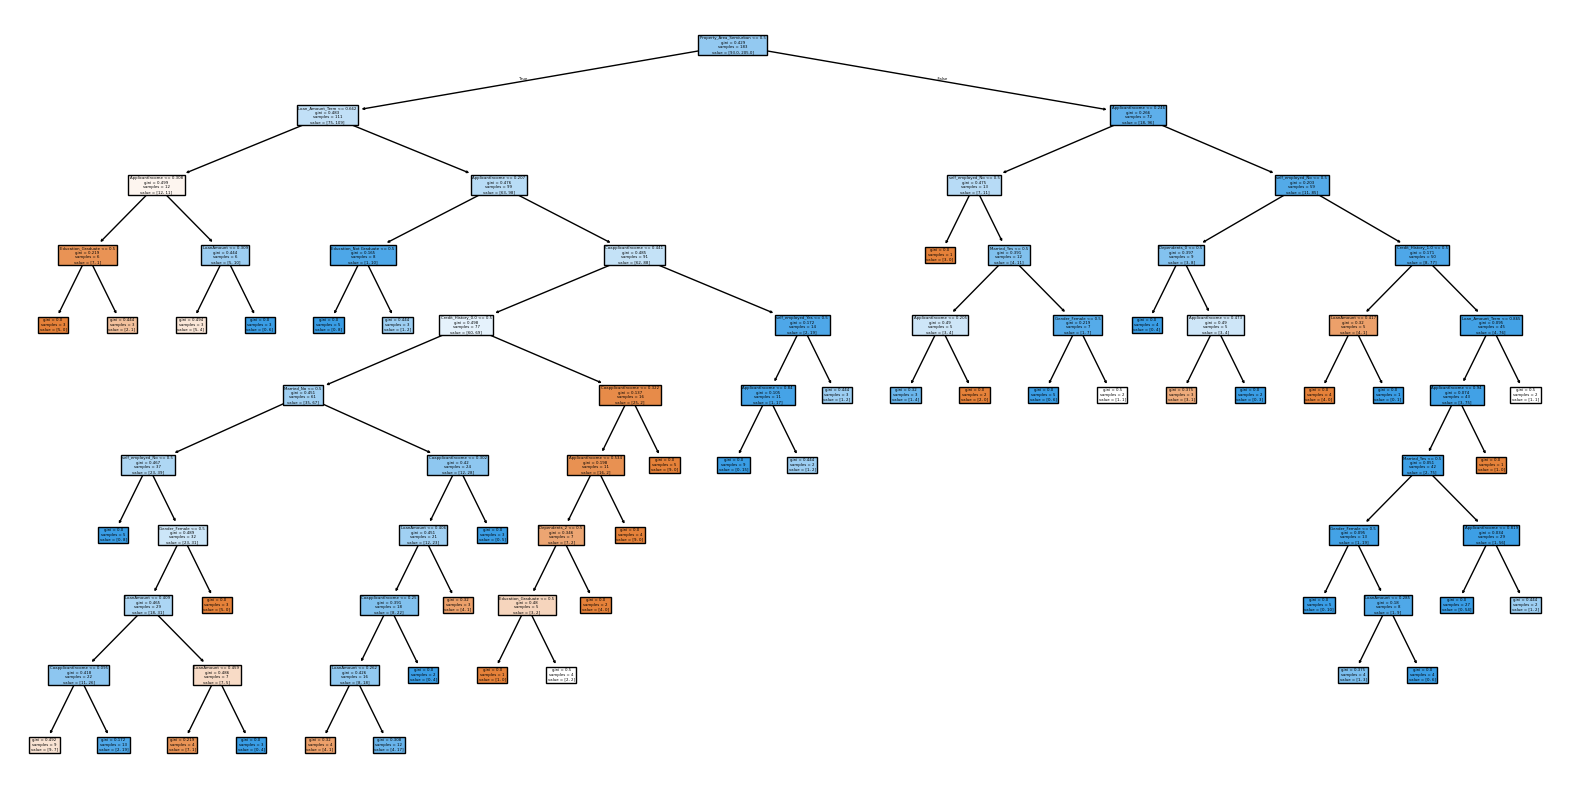

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Sélectionner un arbre spécifique (par exemple, le premier arbre)
tree = random_forest.estimators_[0]  # Le premier arbre dans la forêt

# Visualiser cet arbre
plt.figure(figsize=(20,10))  # Définir la taille de la figure
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()

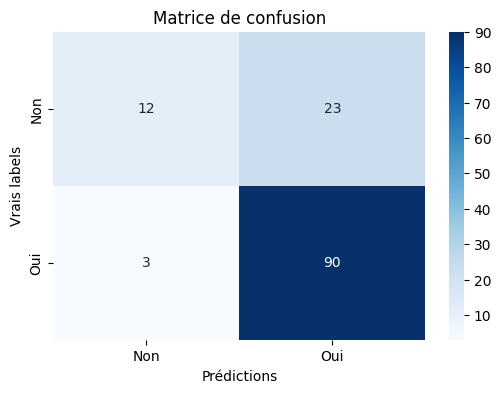

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()

Test d'autres modeles


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
modelGNB = GaussianNB()

# Entraînement du modèle
modelGNB.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = modelGNB.predict(X_test)

# Évaluation de la performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


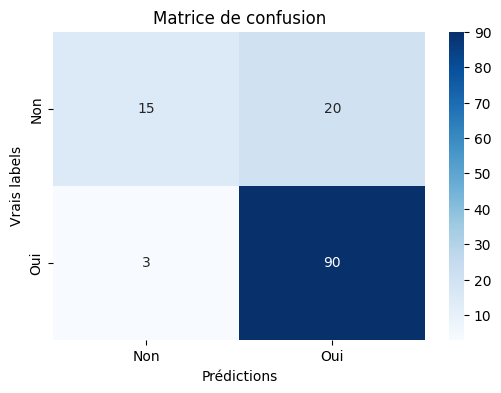

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

# Prédictions et évaluation pour la forêt aléatoire
y_pred_rf = reglog.predict(X_test)
print("reglog - Précision :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



reglog - Précision : 0.8125
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.80      0.99      0.88        93

    accuracy                           0.81       128
   macro avg       0.86      0.67      0.69       128
weighted avg       0.83      0.81      0.78       128



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Modèle LogisticRegression
reglog = LogisticRegression(max_iter=1000)

# Grille de recherche mise à jour
param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': np.logspace(-3, 3, 7)},  # lbfgs + l2
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7)},  # liblinear + l1/l2
]

# Initialiser GridSearchCV avec le modèle
grid_search = GridSearchCV(estimator=reglog, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Entraînement du GridSearch
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés: ", grid_search.best_params_)

# Prédiction avec le meilleur modèle trouvé
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
print("Meilleure précision (avec GridSearch):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Meilleurs paramètres trouvés:  {'C': np.float64(0.1), 'penalty': 'l1', 'solver': 'liblinear'}
Meilleure précision (avec GridSearch): 0.8125
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.80      0.99      0.88        93

    accuracy                           0.81       128
   macro avg       0.86      0.67      0.69       128
weighted avg       0.83      0.81      0.78       128



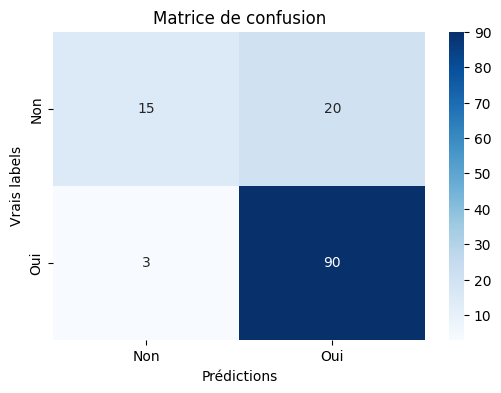

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()

In [23]:
import pickle 
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


Ajustemùent des donnoées smoot

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs paramètres trouvés :  {'C': 1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Meilleure précision (avec GridSearch) : 0.8733333333333333
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       282
           1       0.29      0.78      0.42        18

    accuracy                           0.87       300
   macro avg       0.64      0.83      0.68       300
weighted avg       0.94      0.87      0.90       300



C:\Users\Utilisateur\PycharmProjects\crossvalidation\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


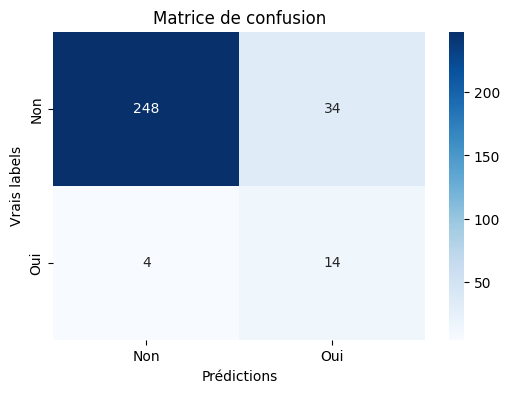

In [24]:
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification

# Génération d'un jeu de données déséquilibré pour l'exemple
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_classes=2, weights=[0.95, 0.05], flip_y=0, random_state=42)

# Séparation du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Application de SMOTETomek pour suréchantillonner la classe minoritaire et nettoyer les exemples
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Appliquer SMOTETomek sur les données d'entraînement
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

# Initialisation du modèle de régression logistique
reglog = LogisticRegression(solver='liblinear', penalty='elasticnet', l1_ratio=0.5, class_weight='balanced')


# Définir les paramètres à tester dans le GridSearch avec des conditions adaptées
param_grid = {
    'C': [0.1, 1, 10],  # Exemple pour la force de régularisation
    'solver': ['saga'],  # Limité à 'saga' pour utiliser 'elasticnet'
    'penalty': ['elasticnet'],  # Utilisation de l'elasticnet uniquement
    'max_iter': [100, 200]  # Ajuster les itérations si nécessaire
}

# Initialiser GridSearchCV avec le modèle
grid_search = GridSearchCV(estimator=reglog, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Entraînement du GridSearch sur les données rééchantillonnées
grid_search.fit(X_res, y_res)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Prédiction avec le meilleur modèle trouvé
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
print("Meilleure précision (avec GridSearch) :", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs paramètres trouvés :  {'C': 1, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}
Meilleure précision (avec GridSearch) : 0.9133333333333333
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       282
           1       0.38      0.72      0.50        18

    accuracy                           0.91       300
   macro avg       0.68      0.82      0.73       300
weighted avg       0.95      0.91      0.93       300

Matrice de confusion :
 [[261  21]
 [  5  13]]


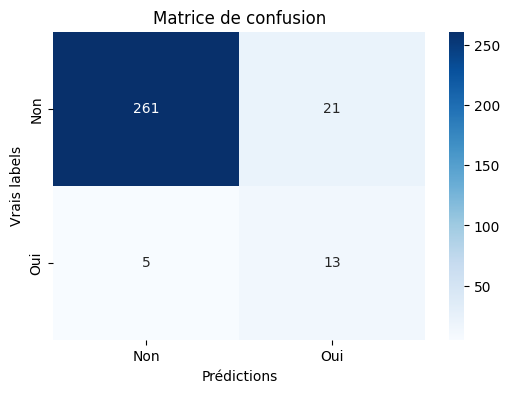

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Utilisation de SMOTE seul
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Paramètres ajustés pour GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [500]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_res, y_res)

# Meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Évaluation finale
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Meilleure précision (avec GridSearch) :", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_best))
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()


F1-score avec seuil 0.4: 0.67
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       282
           1       0.58      0.78      0.67        18

    accuracy                           0.95       300
   macro avg       0.78      0.87      0.82       300
weighted avg       0.96      0.95      0.96       300



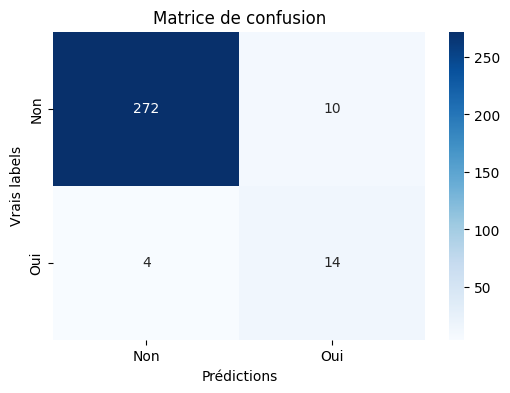

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Initialisation du modèle
xgb = XGBClassifier(scale_pos_weight=10, random_state=42)

# Entraînement
xgb.fit(X_res, y_res)

# Prédictions probabilistes
y_proba = xgb.predict_proba(X_test)[:, 1]

# Ajustement du seuil
optimal_threshold = 0.4
y_pred_thresh = (y_proba >= optimal_threshold).astype(int)

# Évaluation
print(f"F1-score avec seuil {optimal_threshold}: {f1_score(y_test, y_pred_thresh):.2f}")
print(classification_report(y_test, y_pred_thresh))
conf_matrix = confusion_matrix(y_test, y_pred_thresh)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais labels')
plt.show()


In [27]:
 print('Résultat de précision',accuracy_score(y_test, y_pred_thresh))

Résultat de précision 0.9533333333333334


In [28]:
import pickle 
with open('Extremegradientboosting.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


Test avec dataset non normalisé et balancing de target

WIP